In [1]:
%pip install pandas numpy matplotlib seaborn jupyterlab


Note: you may need to restart the kernel to use updated packages.


In [2]:
#3.1A  Individual Athlete Timeline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns


In [4]:
# Load the dataset 
df = pd.read_csv('raw/sixmetrics_data.csv')

In [5]:
# Define the target player names
target_players = ['PLAYER_755', 'PLAYER_705', 'PLAYER_741', 'PLAYER_262']

# Filter the original DataFrame
selected_players = df[df['playername'].isin(target_players)].copy()

In [6]:
selected_players

,id,playername,timestamp,device,metric,value,team,sportsteam,groupteam
1588,58928,PLAYER_262,2021-05-05 14:12:59,hawkins,Jump Height(M),0.400900,"Group: Football Big Skill, Team: Stony Brook F...",Football,Football
1589,58951,PLAYER_262,2021-05-05 14:12:59,hawkins,Peak Propulsive Power(W),5662.619100,"Group: Football Big Skill, Team: Stony Brook F...",Football,Football
1590,58956,PLAYER_262,2021-05-05 14:12:59,hawkins,Peak Velocity(M/S),2.906800,"Group: Football Big Skill, Team: Stony Brook F...",Football,Football
1591,58982,PLAYER_262,2021-05-05 14:12:59,hawkins,Mrsi,0.388500,"Group: Football Big Skill, Team: Stony Brook F...",Football,Football
10026,443208,PLAYER_705,2022-06-15 16:33:40,hawkins,Jump Height(M),0.274800,"Group: 2023-2024 WBB, Group: Women's Basketbal...",Basketball,Women's Basketball
...,...,...,...,...,...,...,...,...,...
100928,6601336,PLAYER_262,2025-10-19 22:35:38,kinexon,Speed_Max,6.515000,Football,Football,Football
101032,6613376,PLAYER_755,2025-10-20 18:31:00,kinexon,Distance_Total,5753.349620,Mens Basketball,Basketball,Men's Basketball
101033,6613437,PLAYER_755,2025-10-20 18:31:00,kinexon,Speed_Max,6.015481,Mens Basketball,Basketball,Men's Basketball
101066,6615330,PLAYER_262,2025-10-21 12:24:21,kinexon,Distance_Total,4996.981351,Football,Football,Football


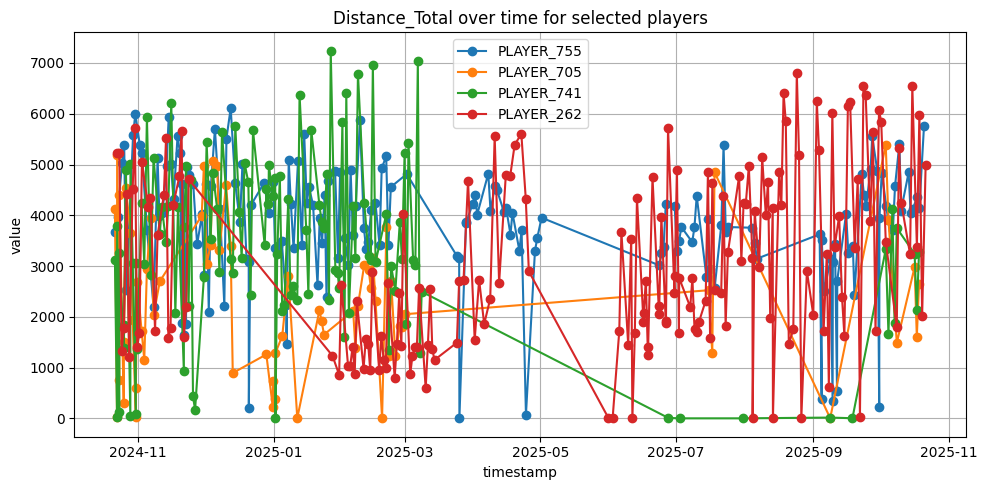

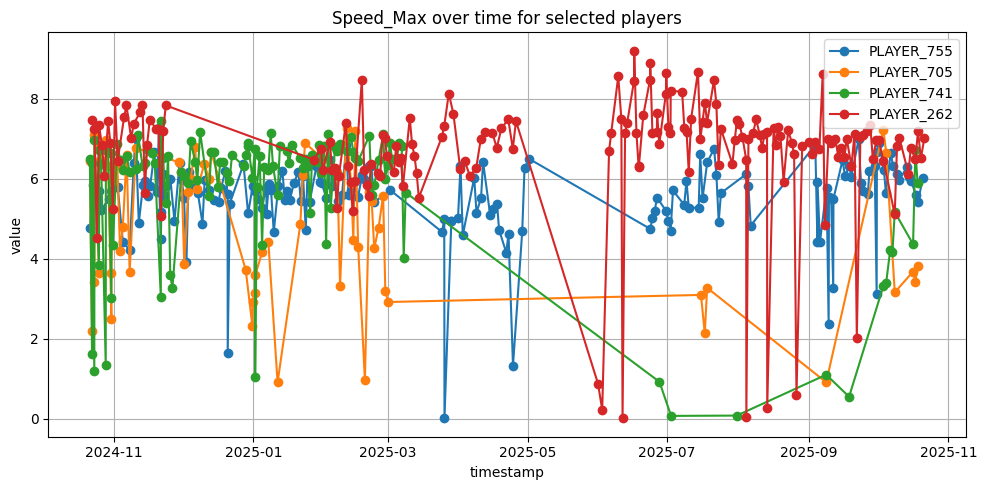

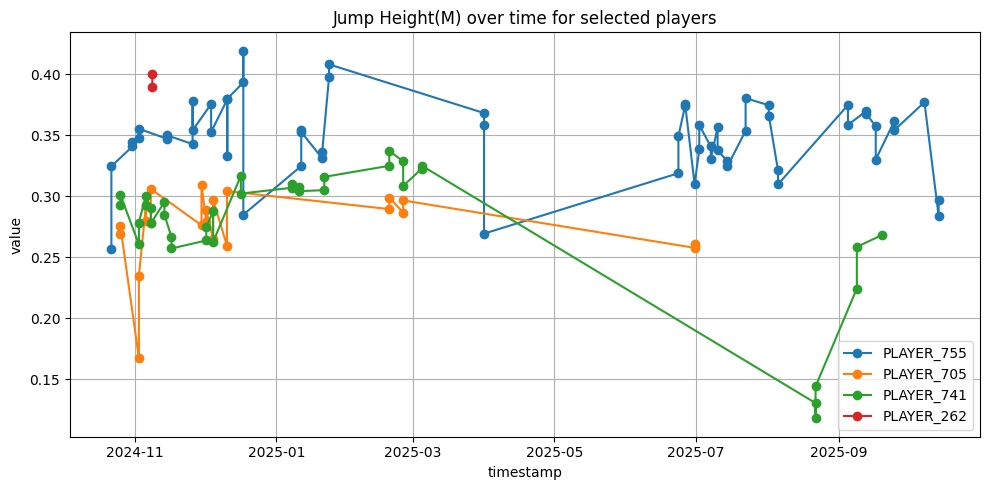

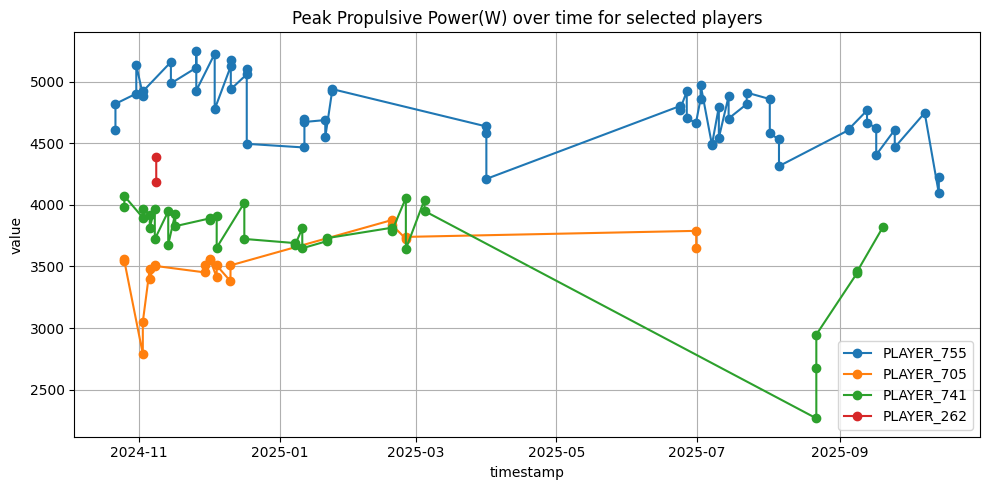

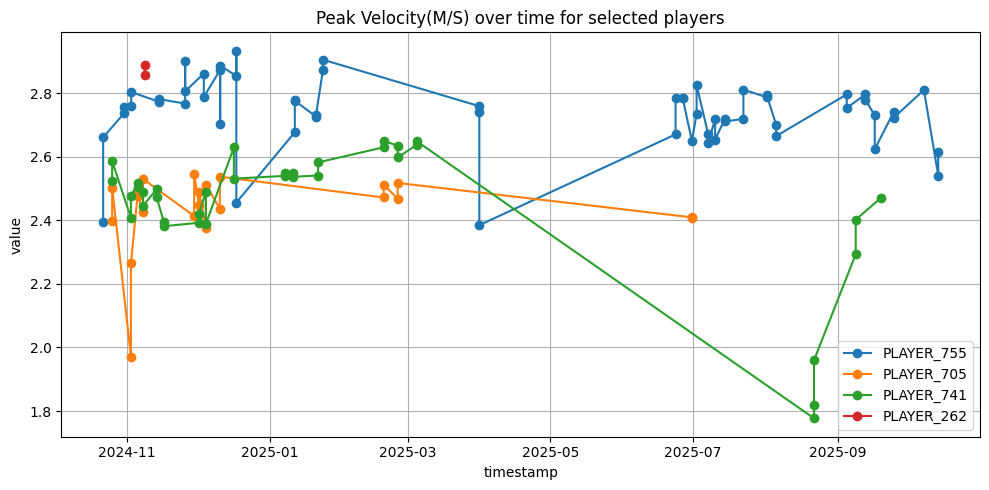

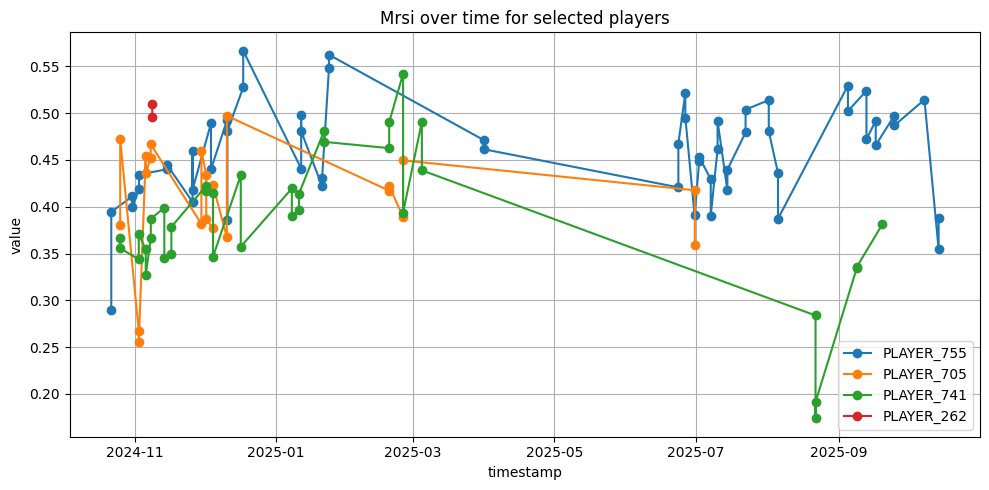

In [7]:
# All 4 players' data visualization
# Convert timestamp to datetime and drop invalid entries
selected_players['timestamp'] = pd.to_datetime(selected_players['timestamp'], errors='coerce')
selected_players = selected_players.dropna(subset=['timestamp'])

# Filter for last 12 months
cutoff_date = selected_players['timestamp'].max() - pd.DateOffset(months=12)
selected_players = selected_players[selected_players['timestamp'] >= cutoff_date]

# Get unique metrics
metrics = selected_players['metric'].unique()

# Plot each metric across all players
for metric in metrics:
    metric_df = selected_players[selected_players['metric'] == metric]
    plt.figure(figsize=(10, 5))

    # Plot each player's data for this metric
    for player in target_players:
        player_df = metric_df[metric_df['playername'] == player]
        plt.plot(player_df['timestamp'], player_df['value'], marker='o', label=player)

    plt.title(f"{metric} over time for selected players")
    plt.xlabel("timestamp")
    plt.ylabel("value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

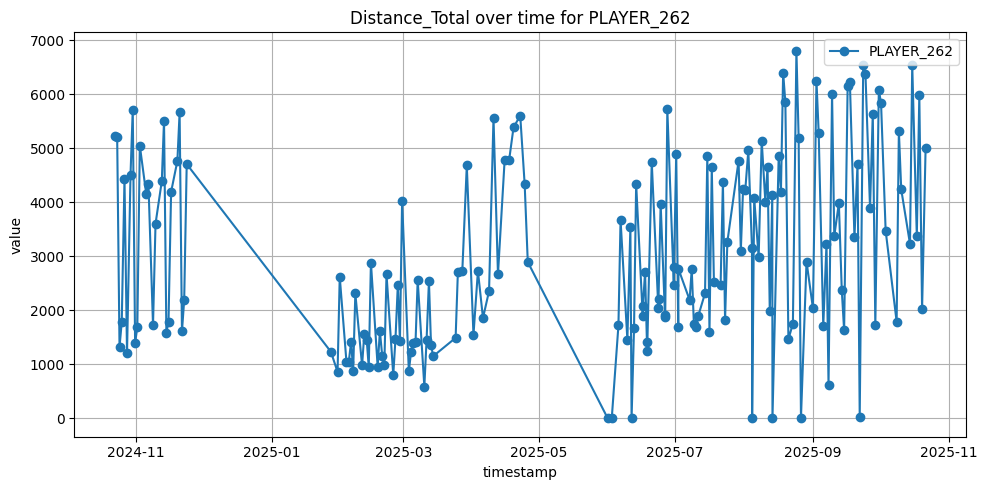

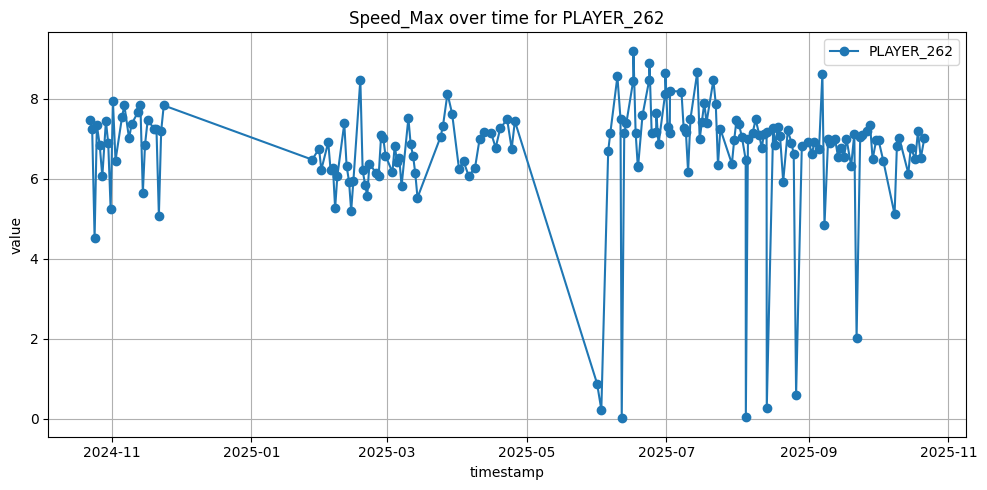

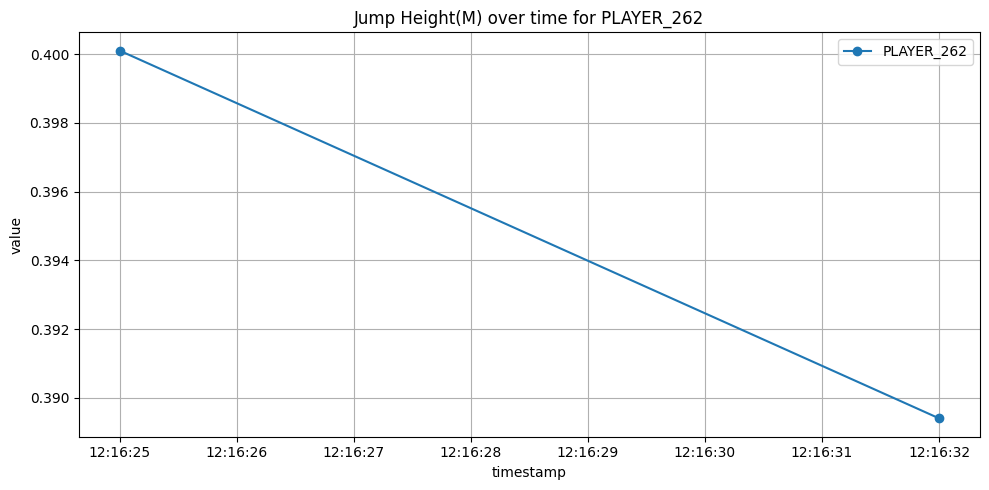

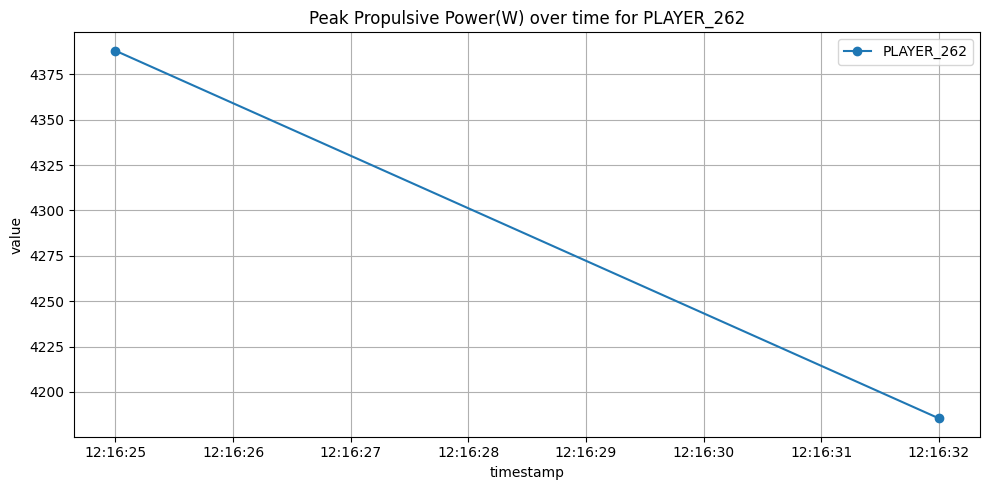

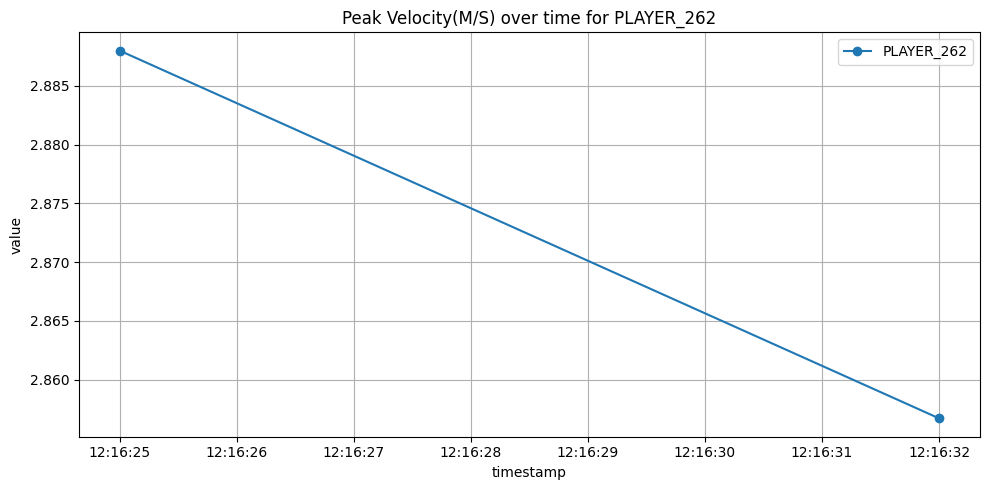

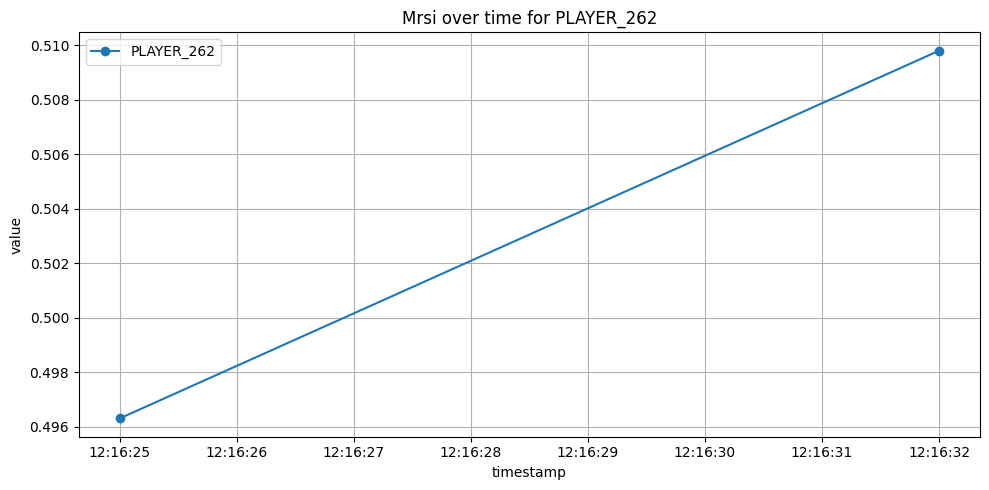

In [8]:
#SINGLE PLAYER VISUALIZATION
# Filter for a single player (e.g., PLAYER_262)
player_id = 'PLAYER_262' # Change player ID to choose different players
player_df = selected_players[selected_players['playername'] == player_id]
# Filter for last 12 months
cutoff_date = player_df['timestamp'].max() - pd.DateOffset(months=12)
player_df = player_df[player_df['timestamp'] >= cutoff_date]
# Get unique metrics
metrics = player_df['metric'].unique()
# Plot each metric for the single player
for metric in metrics:
    metric_df = player_df[player_df['metric'] == metric]
    plt.figure(figsize=(10, 5))
    plt.plot(metric_df['timestamp'], metric_df['value'], marker='o', label=player_id)
    plt.title(f"{metric} over time for {player_id}")
    plt.xlabel("timestamp")
    plt.ylabel("value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
##3.1B Identify their best and worst performance dates
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp', 'value'])

# Group by metric to find best and worst performance dates
best_dates = (
    player_df.loc[player_df.groupby('metric')['value'].idxmax()]
    [['metric', 'value', 'timestamp']]
    .rename(columns={'value': 'best_value', 'timestamp': 'best_date'})
)

worst_dates = (
    player_df.loc[player_df.groupby('metric')['value'].idxmin()]
    [['metric', 'value', 'timestamp']]
    .rename(columns={'value': 'worst_value', 'timestamp': 'worst_date'})
)

# Merge best and worst into one summary
performance_summary = pd.merge(best_dates, worst_dates, on='metric')

# Display results
print(f"Best and worst performance dates for {player_df['playername'].iloc[0]}:")
print(performance_summary.sort_values(by='metric'))

Best and worst performance dates for PLAYER_262:
                     metric   best_value           best_date  worst_value  \
0            Distance_Total  6806.510499 2025-08-24 12:21:36       0.0201   
1            Jump Height(M)     0.400100 2024-11-08 12:16:25       0.3894   
2                      Mrsi     0.509800 2024-11-08 12:16:32       0.4963   
3  Peak Propulsive Power(W)  4388.015700 2024-11-08 12:16:25    4185.4450   
4        Peak Velocity(M/S)     2.888000 2024-11-08 12:16:25       2.8567   
5                 Speed_Max     9.205500 2025-06-16 14:26:54       0.0070   

           worst_date  
0 2025-06-11 11:57:41  
1 2024-11-08 12:16:32  
2 2024-11-08 12:16:25  
3 2024-11-08 12:16:32  
4 2024-11-08 12:16:32  
5 2025-06-11 11:57:41  


In [10]:
#3.1C Calculate if they show improvement or decline trends over the last 12 months for each metric
# Prepare to store trend results
player_name = 'PLAYER_755'  # Change to desired player
player_df = selected_players[selected_players['playername'] == player_name]

# Get unique metrics for this player
metrics_player = player_df['metric'].unique()

# calculate_trend_per_metric
trend_results = []
for metric in metrics_player:
    metric_df = player_df[player_df['metric'] == metric]
    if len(metric_df) >= 2:  #minimum_data_check
        # Convert timestamps to ordinal for regression
        x = metric_df['timestamp'].map(pd.Timestamp.toordinal)
        y = metric_df['value']

        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        trend = 'improving' if slope > 0 else 'declining' if slope < 0 else 'stable'

        # Append results
        trend_results.append({
            'metric': metric,
            'slope': slope,
            'trend': trend,
            'p_value': p_value
        })

#display_trend_summary
trend_df = pd.DataFrame(trend_results)
print(f"\nTrend analysis for {player_name} over the last 12 months:")
print(trend_df.sort_values(by='metric'))



Trend analysis for PLAYER_755 over the last 12 months:
                     metric     slope      trend   p_value
0            Distance_Total -1.584323  declining  0.041027
2            Jump Height(M) -0.000015  declining  0.664548
5                      Mrsi  0.000078  improving  0.172418
3  Peak Propulsive Power(W) -1.180430  declining  0.000003
4        Peak Velocity(M/S) -0.000144  declining  0.214358
1                 Speed_Max  0.000231  improving  0.710329
